蒙特卡洛模拟，也称统计模拟方法，是一种以概率统计理论为指导的数值计算方法。它使用随机数（或更常见的伪随机数）来解决很多计算问题，尤其适用于那些难以用解析方法求解的问题。蒙特卡洛模拟在多个领域都有广泛的应用，为后面使用方便，这里做几个例子的说明。
蒙特卡洛模拟的优点主要包括：

- 灵活性和通用性强：蒙特卡洛模拟可以处理各种类型的问题，包括确定性问题和随机性问题，能够模拟各种概率分布和随机过程。这使得它在多个领域都有广泛的应用，如金融、物理、工程等。
- 精度高：通过大量的随机抽样和模拟试验，蒙特卡洛模拟可以得到非常精确的结果，特别是对于复杂的高维问题和非线性问题，其优势更加明显。
- 可并行计算：蒙特卡洛模拟的各个模拟试验是相互独立的，因此可以很容易地实现并行计算，提高计算效率。

蒙特卡洛模拟也存在一些缺点：
- 计算量大：为了达到所需的精度，蒙特卡洛模拟通常需要进行大量的随机抽样和模拟试验，这可能导致计算时间较长，成本较高。
- 收敛速度慢：蒙特卡洛模拟的收敛速度通常与问题的维度和复杂性有关。对于高维问题和复杂问题，可能需要更多的模拟试验才能达到所需的精度，这进一步增加了计算成本和时间。
- 对随机数生成器的依赖性：蒙特卡洛模拟的结果依赖于随机数生成器的质量和性能。如果随机数生成器存在偏差或不足够随机，那么模拟结果可能会出现偏差或不准确。

#### 计算圆周率

In [18]:

import random  
  
def calculate_pi(num_points: int) -> float:  
    inside_circle = 0  
  
    for _ in range(num_points):  
        x = random.uniform(0, 1)  
        y = random.uniform(0, 1)  
  
        # 如果点在单位圆内，那么到原点的距离会小于1  
        if x**2 + y**2 <= 1:  
            inside_circle += 1  
  
    # 由于我们在一个1x1的正方形中生成点，该正方形的面积为1。  
    # 单位圆的面积为π/4，因此，落在单位圆内的点的比例应该接近π/4。  
    # 所以，我们可以通过4 * (落在圆内的点数 / 总点数) 来估算π的值。  
    return 4 * inside_circle / num_points  
  
# 使用1000000个点进行模拟  
number_points = 1
for i in range(8):
    number_points = number_points  * 10
    print("numpoint:", number_points, ",π:",calculate_pi(number_points))

numpoint: 10 ,π: 4.0
numpoint: 100 ,π: 3.56
numpoint: 1000 ,π: 3.096
numpoint: 10000 ,π: 3.1332
numpoint: 100000 ,π: 3.14748
numpoint: 1000000 ,π: 3.14362
numpoint: 10000000 ,π: 3.1412104
numpoint: 100000000 ,π: 3.1417054


这是一个蒙特卡洛模拟，每次运行的结果可能会有所不同。要得到更准确的结果，可以增加num_points的值，但这也会增加计算的时间

#### 模拟计算x^2 微积分

Estimated integral: 0.333845371572271
True integral: 0.3333333333333333


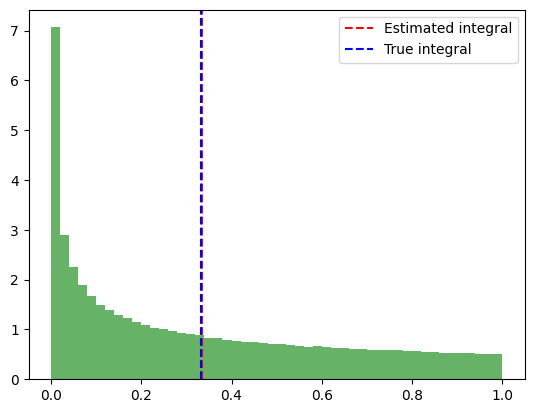

In [44]:
import numpy as np  
import matplotlib.pyplot as plt  
  
# 定义函数  
def f(x):  
    return x**2  
  
# 定义积分区间  
a = 0  
b = 1  
  
# 定义模拟的总次数  
N_trials = 1000000  
  
# 生成随机数  
x = np.random.uniform(a, b, N_trials)  
  
# 计算函数在这些随机点上的值  
y = f(x)  
  
# 估计的积分值等于y的平均值乘以区间的宽度  
integral_estimate = np.mean(y) * (b - a)  
  
# 输出估计的积分值  
print("Estimated integral:", integral_estimate)  
  
# 真实值（用于比较）  
true_integral = 1/3  # 因为 ∫x^2 dx 从0到1是1/3  
print("True integral:", true_integral)  
  
# 可视化  
plt.hist(y, bins=50, density=True, alpha=0.6, color='g')  
plt.axvline(x=integral_estimate, color='r', linestyle='--', label='Estimated integral')  
plt.axvline(x=true_integral, color='b', linestyle='--', label='True integral')  
plt.legend()  
plt.show()

In [34]:
####  模拟产生单个股票价格 

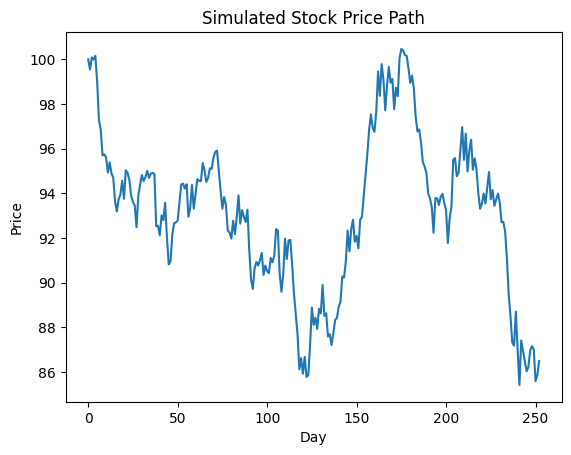

In [30]:
import numpy as np  
import matplotlib.pyplot as plt  
  
# 初始股票价格  
initial_price = 100  
# 模拟天数  
num_days = 252  
# 每日回报率的标准差  
daily_volatility = 0.01  
  
# 生成随机每日回报率  
daily_returns = np.random.normal(0, daily_volatility, num_days)  
  
# 模拟股票价格路径  
price_path = [initial_price]  
for daily_return in daily_returns:  
    price_path.append(price_path[-1] * (1 + daily_return))  

# 绘制股票价格路径  
plt.plot(price_path)  
plt.title('Simulated Stock Price Path')  
plt.xlabel('Day')  
plt.ylabel('Price')  
plt.show()

In [35]:
####  模拟产生多个股票价格 

/var/folders/ly/1ryqrn0s2bb43n57sbkb4p4c0000gn/T/ipykernel_51858/4144422653.py:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  prices[i, day] = prices[i, day-1] * (1 + change)


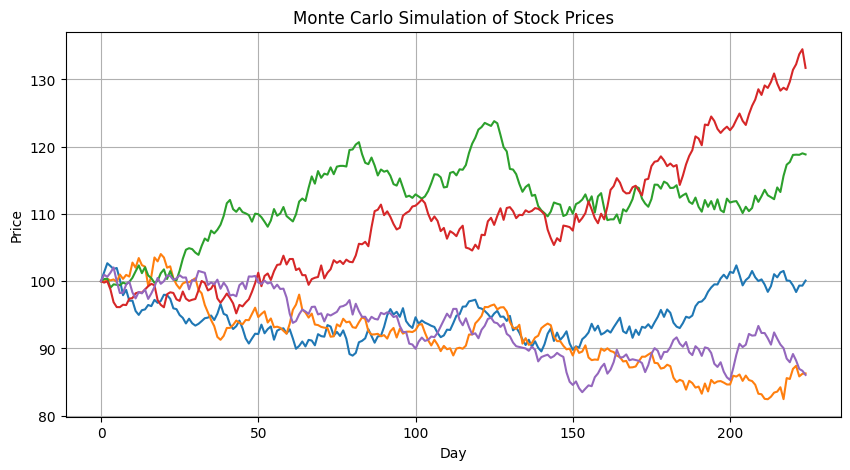

In [32]:
import numpy as np  
import matplotlib.pyplot as plt  
  
# 股票初始价格  
initial_price = 100  
# 模拟的天数  
days = 225 
# 每天的价格变动标准差  
volatility = 0.01  
# 每天的收益率，假设随机事件，为0 
daily_return = 0.00 
# 模拟的股票个数  
num_simulations = 100  
  
# 存储模拟价格的数组  
prices = np.zeros((num_simulations, days))  
  
# 初始化价格  
for i in range(num_simulations):  
    prices[i, 0] = initial_price  
      
# 蒙特卡洛模拟  
for i in range(num_simulations):  
    for day in range(1, days):  
        # 生成正态分布的随机变动  
        change = np.random.normal(loc=daily_return, scale=volatility, size=1)  
        # 计算新价格  
        prices[i, day] = prices[i, day-1] * (1 + change)  

# 绘制几条模拟路径  
plt.figure(figsize=(10, 5))  
for i in range(5):  # 只绘制5条路径以便观察  
    plt.plot(prices[i, :])  

plt.xlabel('Day')  
plt.ylabel('Price')  
plt.title('Monte Carlo Simulation of Stock Prices')  
plt.grid(True)  
plt.show()